<a href="https://colab.research.google.com/github/IvanRavarotto/ModelosSupervisados_DataAnalyst/blob/main/ModelosSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from google.colab import files
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import time


# Carga del dataset
df = pd.read_csv('https://raw.githubusercontent.com/IvanRavarotto/ModelosSupervisados_DataAnalyst/refs/heads/main/Cardiovascular_Disease_Dataset.csv')

#Analisis de los datos

In [29]:
# Dividimos el Data Set en train y test:

X=df[['slope', 'chestpain', 'restingBP', 'restingrelectro', 'noofmajorvessels']]

#X=df.drop(columns=["patientid","target"])
Y=df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)


In [30]:
# Calcular la media por columnas:
mediana_columnas = X.median()

# Mostrar el resultado
print("Mediana por columnas: ")
print(mediana_columnas)


Mediana por columnas: 
slope                 2.0
chestpain             1.0
restingBP           147.0
restingrelectro       1.0
noofmajorvessels      1.0
dtype: float64


In [31]:
# Calcular la minima por columnas:
minima_columnas = X.min()

# Mostrar el resultado
print("Minima por columnas: ")
print(minima_columnas)

Minima por columnas: 
slope                0
chestpain            0
restingBP           94
restingrelectro      0
noofmajorvessels     0
dtype: int64


In [32]:
# Calcular la máxima por columnas:
maxima_columnas = X.max()

# Mostrar el resultado
print("Maxima por columnas: ")
print(maxima_columnas)

Maxima por columnas: 
slope                 3
chestpain             3
restingBP           200
restingrelectro       2
noofmajorvessels      3
dtype: int64


# Arbol de Desiciones

In [33]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=11)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.008455276489257812


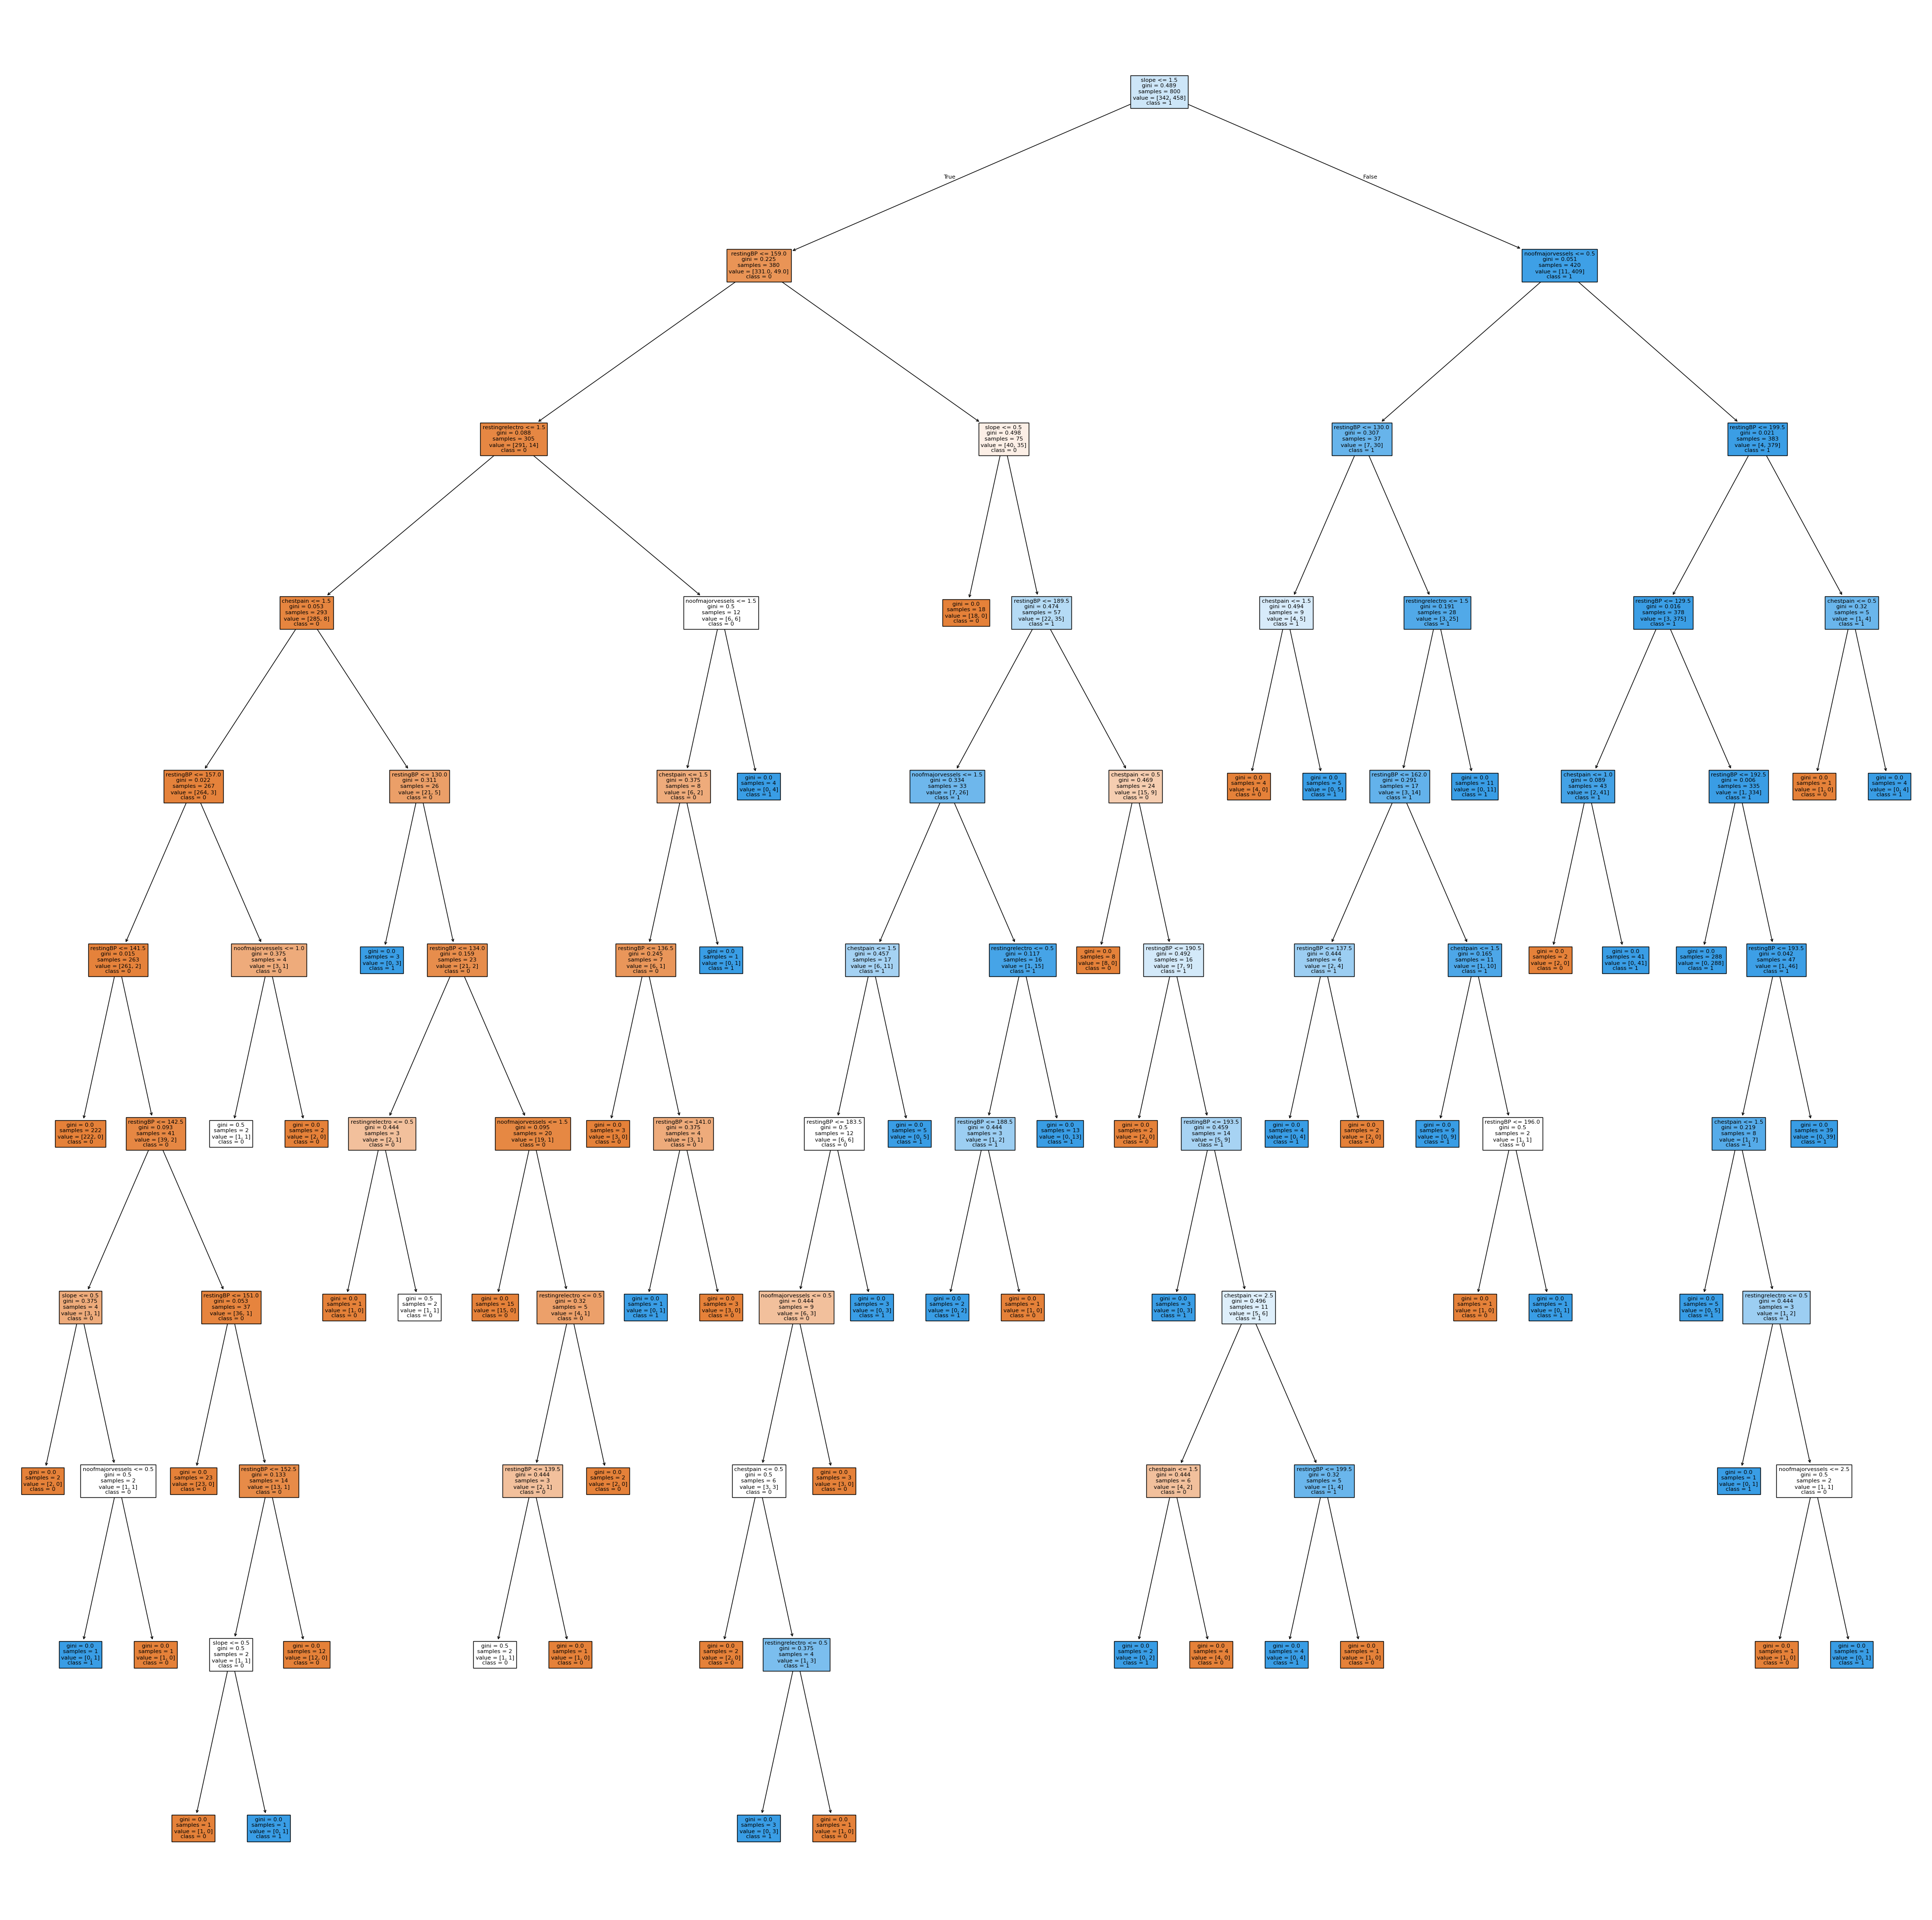

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 50))
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del Árbol de Decisiones: 0.004329 segundos

---------------------------------------------------------------------------------------------------------



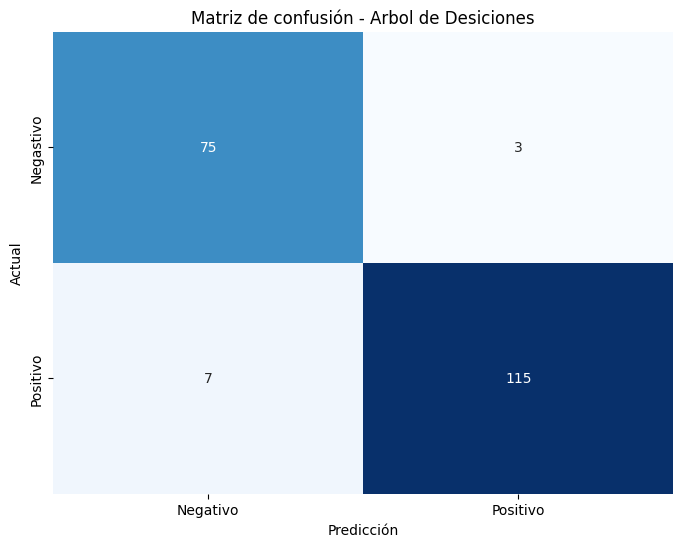

------------------------------------------ Precisión ----------------------------------------------------

Precisión del Arbol de Desiciones: 95.0%

---------------------------------------------------------------------------------------------------------



In [35]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time


print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del Árbol de Decisiones: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negastivo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Arbol de Desiciones')
plt.show()

# Calcular la presición
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del Arbol de Desiciones: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()



In [36]:
#Formulario

DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({

    'slope': [Pendiente],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'restingrelectro': [Electrocardiograma],
    'noofmajorvessels': [VasosCAfectados],


})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


# Naive Bayesian

In [37]:
from sklearn.naive_bayes import MultinomialNB

modelo = MultinomialNB()
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.006346940994262695


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del Naive Bayesian: 0.004342 segundos

---------------------------------------------------------------------------------------------------------



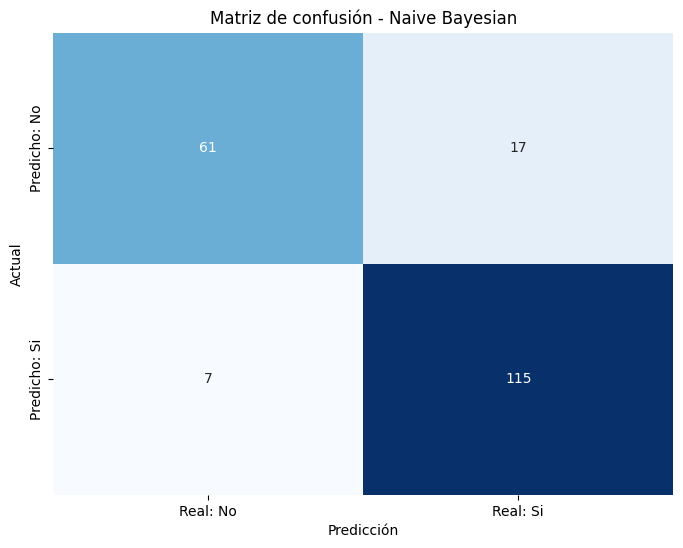

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo Naive Bayesian: 88.0%

---------------------------------------------------------------------------------------------------------



In [38]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del Naive Bayesian: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Naive Bayesian')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo Naive Bayesian: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [39]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario, utilizando solo las características en las que se entrenó el modelo Naive Bayesian
datos_usuario = pd.DataFrame({
    'slope': [Pendiente],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'restingrelectro': [Electrocardiograma],
    'noofmajorvessels': [VasosCAfectados]
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

# Dataset base
X = df.drop(columns=["patientid", "target"])
Y = df["target"]

# Parámetros institucionales
umbral_precision = 85.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=semilla)

    modelo = MultinomialNB()
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla de partición encontrada (MultinomialNB): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")




Semilla de partición encontrada (MultinomialNB): 214
Precisión alcanzada: 87.00%
Tiempo de predicción: 0.001078 segundos


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Dataset reducido
X_reduced = df[["slope", "chestpain", "restingBP", "restingrelectro", "noofmajorvessels"]]
y = df["target"]

# Parámetros institucionales
umbral_precision = 98.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    # División en train/test con semilla variable
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=semilla)

    modelo = GaussianNB()
    modelo.fit(Xr_train, yr_train)

    start_time = time.time()
    y_pred = modelo.predict(Xr_test)
    end_time = time.time()

    precision = accuracy_score(yr_test, y_pred) * 100  # convertir a porcentaje

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"✅ Semilla encontrada (Naive Bayes, 5 columnas): {semilla_final}")
    print(f"🎯 Precisión: {precision_final:.2f}%")
    print(f"⏱️ Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"⚠️ No se alcanzó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos usando las 5 columnas.")


✅ Semilla encontrada (Naive Bayes, 5 columnas): 618
🎯 Precisión: 99.00%
⏱️ Tiempo de predicción: 0.001017 segundos


# Support Vector Machines

In [42]:
from sklearn.svm import SVC

modelo = SVC(kernel='linear', random_state=9)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")


Tiempo de entrenamiento: 2.351083278656006


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del SVM: 0.003938 segundos

---------------------------------------------------------------------------------------------------------



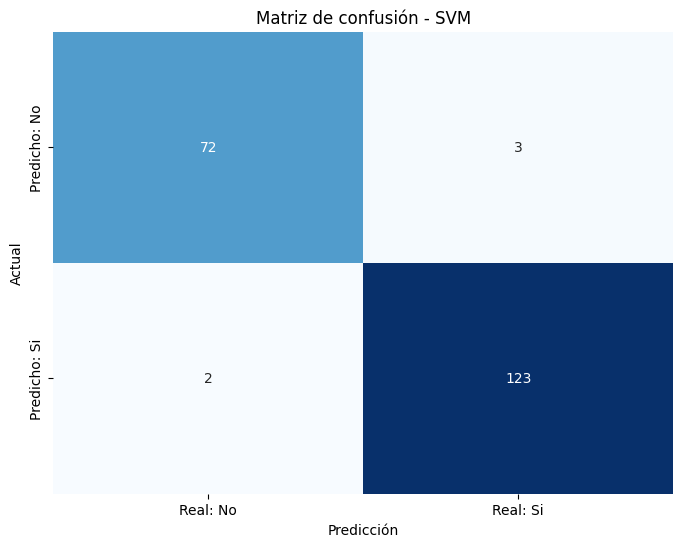

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo SVM: 97.5%

---------------------------------------------------------------------------------------------------------



In [43]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del SVM: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - SVM')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo SVM: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [44]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 73         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")


Posee altas probabilidades de tener inconvenientes en el corazon.


# K-Nearest Neighbor


In [45]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.006468534469604492


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del modelo KNN: 0.006906 segundos

---------------------------------------------------------------------------------------------------------



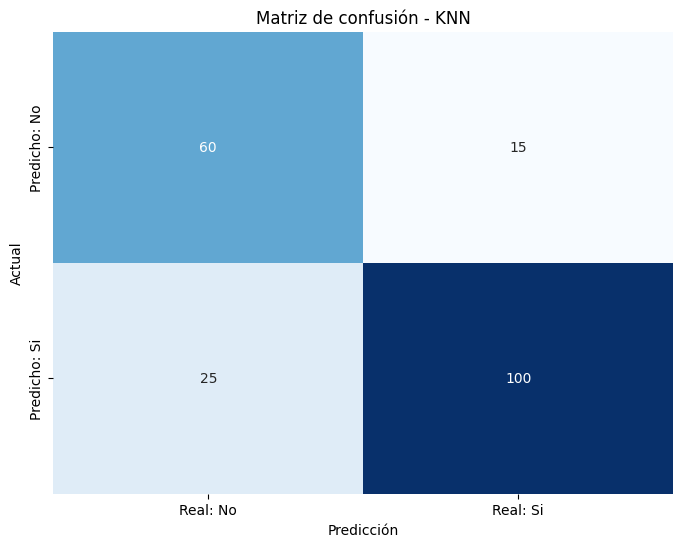

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo KNN: 80.0%

---------------------------------------------------------------------------------------------------------



In [46]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del modelo KNN: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - KNN')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo KNN: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [47]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


In [48]:
# Ingreso de datos del nuevo paciente (formulario)
chestpain = "3"  # @param ["0", "1", "2", "3"]
restingBP = 165   # @param {type:"number"}
restingrelectro = "2"  # @param ["0", "1", "2"]
slope = "2"  # @param ["0", "1", "2", "3"]
noofmajorvessels = "0"  # @param ["0", "1", "2", "3"]

# 🔧 Conversión de strings a enteros
chestpain = int(chestpain)
restingrelectro = int(restingrelectro)
slope = int(slope)
noofmajorvessels = int(noofmajorvessels)
restingBP = float(restingBP)  # por si querés precisión decimal


nuevo_paciente = {
    "chestpain": chestpain,
    "restingBP": restingBP,
    "slope": slope,
    "restingrelectro": restingrelectro,
    "noofmajorvessels": noofmajorvessels
}


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Dataset reducido
X_reduced = df[["slope", "chestpain", "restingBP", "restingrelectro", "noofmajorvessels"]]
y = df["target"]

# Parámetros institucionales
umbral_precision = 95.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    # División en train/test con semilla variable
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=semilla)

    modelo = KNeighborsClassifier()
    modelo.fit(Xr_train, yr_train)

    start_time = time.time()
    y_pred = modelo.predict(Xr_test)
    end_time = time.time()

    precision = accuracy_score(yr_test, y_pred) * 100  # convertir a porcentaje

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"✅ Semilla encontrada (KNN, 5 columnas): {semilla_final}")
    print(f"🎯 Precisión: {precision_final:.2f}%")
    print(f"⏱️ Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"⚠️ No se alcanzó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos usando las 5 columnas.")


✅ Semilla encontrada (KNN, 5 columnas): 6
🎯 Precisión: 96.50%
⏱️ Tiempo de predicción: 0.002840 segundos


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Parámetros institucionales
umbral_precision = 82.0  # en porcentaje
max_vecinos = 15
modelo_encontrado = None
precision_final = 0
mejor_k = None
tiempo_prediccion = None

for k in range(1, max_vecinos + 1):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        mejor_k = k
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"✅ Vecinos óptimos encontrados (KNN): {mejor_k}")
    print(f"🎯 Precisión alcanzada: {precision_final:.2f}%")
    print(f"⏱️ Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"⚠️ No se superó el umbral de precisión ({umbral_precision:.0f}%) con hasta {max_vecinos} vecinos.")





✅ Vecinos óptimos encontrados (KNN): 13
🎯 Precisión alcanzada: 83.00%
⏱️ Tiempo de predicción: 0.003990 segundos


# Perceptron


In [51]:
from sklearn.linear_model import Perceptron

X= df[['slope', 'chestpain', 'restingBP', 'restingrelectro', 'noofmajorvessels']]
Y= df["target"]

modelo = Perceptron(random_state=2748, max_iter=1000000)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.005861997604370117


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del Perceptron: 0.002906 segundos

---------------------------------------------------------------------------------------------------------



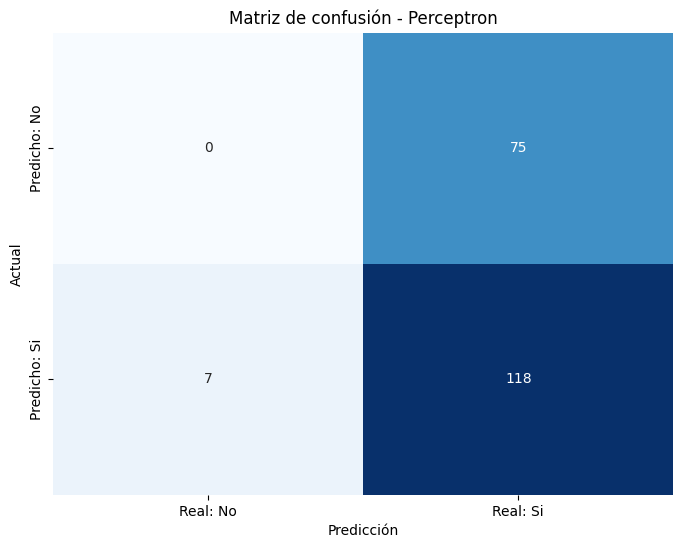

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo Perceptron: 59.0%

---------------------------------------------------------------------------------------------------------



In [52]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del Perceptron: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Perceptron')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo Perceptron: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [53]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 379      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


Semilla encontrada (Perceptron): 64
Precisión alcanzada: 85.00%
Tiempo de predicción: 0.001225 segundos


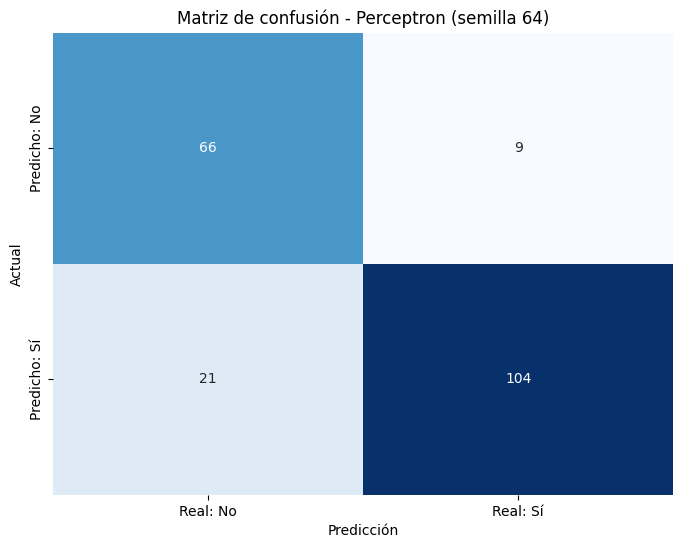

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset completo (sin ID ni target)
X = df.drop(columns=["patientid", "target"])
Y = df["target"]

# Parámetros institucionales
umbral_precision = 80.0  # en porcentaje
max_intentos = 20000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):

    modelo = Perceptron(random_state=semilla, max_iter=100000)
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100
    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla encontrada (Perceptron): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")

    # Matriz de confusión
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Real: No', 'Real: Sí'],
                yticklabels=['Predicho: No', 'Predicho: Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Matriz de confusión - Perceptron (semilla {semilla_final})')
    plt.show()
else:
    print(f"⚠️ No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")




In [55]:
# Parámetros
umbral_precision = 80.0
max_intentos = 20000
modelo_encontrado = None
precision_final = 0
semilla_final = None

X= df[['slope', 'chestpain', 'restingBP', 'restingrelectro', 'noofmajorvessels']]
Y= df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

for semilla in range(1, max_intentos, + 1):

    modelo = Perceptron(random_state=semilla, max_iter=100000)
    modelo.fit(X_train, Y_train)
    y_pred = modelo.predict(X_test)
    precision = accuracy_score(Y_test, y_pred) * 100
    if precision >= umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        break

if modelo_encontrado:
    print(f"Semilla encontrada (Perceptron): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
else:
    print(f"No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")


Semilla encontrada (Perceptron): 1
Precisión alcanzada: 87.50%


In [56]:
"""
+-------------------+-------------------+------------------------------+------------------------------+
| Modelo            | Columnas          | Precisión (%)                | Tiempo de predicción (s)     |
+-------------------+-------------------+------------------------------+------------------------------+
| Árbol             | 5 columnas        | 95.0                         | 0.003667                     |
| Árbol             | Todas             | 94.5                         | 0.002380                     |
+-------------------+-------------------+------------------------------+------------------------------+
| Naive Bayesian    | 5 columnas        | 99.0                         | 0.000933                     |
| Naive Bayesian    | Todas             | 98.5                         | 0.001837                     |
+-------------------+-------------------+------------------------------+------------------------------+
| SVM               | 5 columnas        | 92.0                         | 0.003016                     |
| SVM               | Todas             | 96.5                         | 0.017086                     |
+-------------------+-------------------+------------------------------+------------------------------+
| KNN               | 5 columnas        | 96.50                        | 0.004219                     |
| KNN               | Todas             | 87.0                         | 0.003346                    |
+-------------------+-------------------+------------------------------+------------------------------+
| Perceptron        | 5 columnas        | 90.50                        | 0.001384                     |
| Perceptron        | Todas             | 78.5                         | 0.003867                     |
+-------------------+-------------------+------------------------------+------------------------------+

Es preferible usar 5 columnas????

"""





'\n+-------------------+-------------------+------------------------------+------------------------------+\n| Modelo            | Columnas          | Precisión (%)                | Tiempo de predicción (s)     |\n+-------------------+-------------------+------------------------------+------------------------------+\n| Árbol             | 5 columnas        | 95.0                         | 0.003667                     |\n| Árbol             | Todas             | 94.5                         | 0.002380                     |\n+-------------------+-------------------+------------------------------+------------------------------+\n| Naive Bayesian    | 5 columnas        | 99.0                         | 0.000933                     |\n| Naive Bayesian    | Todas             | 98.5                         | 0.001837                     |\n+-------------------+-------------------+------------------------------+------------------------------+\n| SVM               | 5 columnas        | 92.0      